### Import Libraries

In [19]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Activation
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import utils

### Load Data

In [20]:
(X_traintest, y_traintest), (X_10000, y_10000) = mnist.load_data()
X_traintest = X_traintest.reshape(60000, 784)
X_10000 = X_10000.reshape(10000, 784)
X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest)

num_classes = 10
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_10000 = utils.to_categorical(y_10000, num_classes)

### Model Selection

We first search for the best model with 2 hidden layers.

KeyboardInterrupt: 

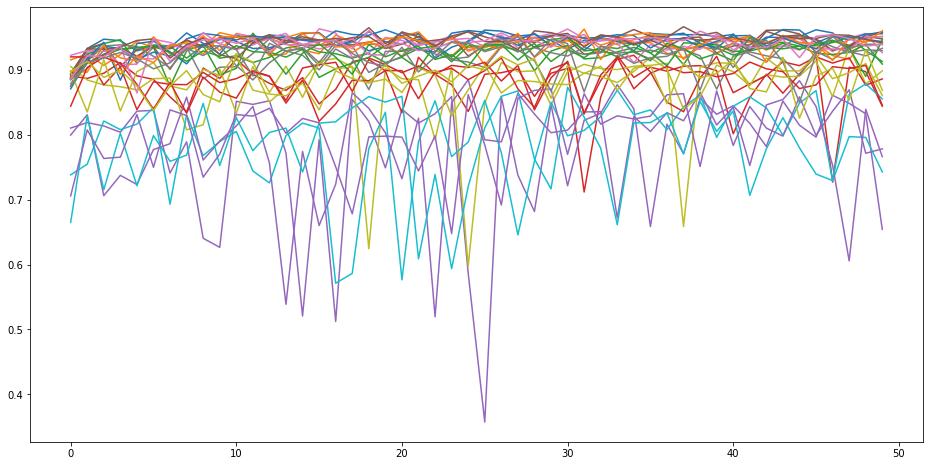

In [37]:
# function to create a 2 layer model
def make_model(hidden_size=(784,784), regularization = 0.1):
    model = Sequential()
    model.add(Dense(hidden_size[0], input_dim = 784, activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[1], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
    return model

# set parameter values
hidden_size = [(784,784),(784,512),(512,512),(512,392),(392,392),(392,196)]
regularization = [1e-3,1e-2,1e-1,1,10]

# combine different parameters into a list
config_list = []
for x in hidden_size:
    for y in regularization:
        config_list += [[x,y]]

# variables to store validation scores
validation_history = []        
average_validation = np.empty(len(config_list), 50)
i = 0

# for each set of parameters
for config in config_list:
    
    # create and fit model
    model = make_model(config[0],config[1])
    history = model.fit(X_10000, y_10000, validation_split = 0.25, epochs = 50, verbose = 0, workers = 12)
    
    # store training history 
    validation_history += [np.max(history.history['val_accuracy'])]
    average_validation[i] = history.history['val_accuracy']
    i += 1
    
    
plt.figure(figsize=(16,8))
plt.plot(np.mean(average_validation, axis = 0), label = 'average validation score')
plt.plot(average_validation[np.argmax(validation_history)], label = 'best parameter')
plt.title('Model Accuracy for 2 Layer Model')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Best Validation Accuracy is ' + str(np.max(validation_history)))
print('Best parameters: ' + str(config[np.argmax(validation_history)]))

In [51]:
average_validation = np.empty((len(config_list),50))
average_validation[0] = history.history['val_accuracy']
np.mean(average_validation, axis = 0)

(30,)